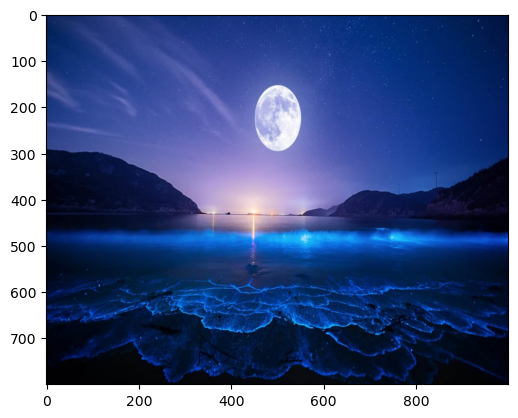

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem4/ADA/img2.jpeg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.resize(image, (1000, 800))
plt.imshow(image)

In [ ]:
mean_kernel=np.ones((5,5),np.float32)/25
mean_filtered=cv2.filter2D(image,-1,mean_kernel)
gaussian_filtered=cv2.GaussianBlur(image,(5,5),0)
sobelx=cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
sobel_filtered=np.hypot(sobelx,sobely)
laplacian_filtered=cv2.Laplacian(image,cv2.CV_64F)
median_filtered=cv2.medianBlur(image,5)
bilateral_filtered=cv2.bilateralFilter(image,9,75,75)

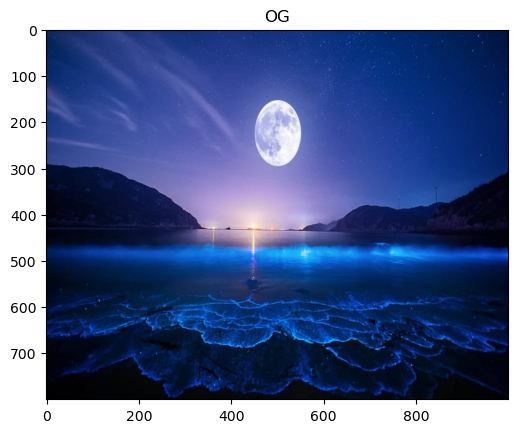

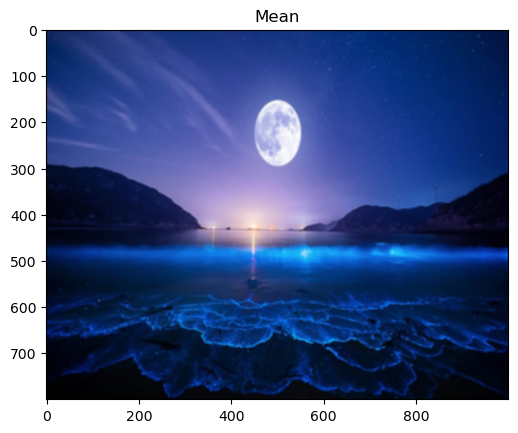

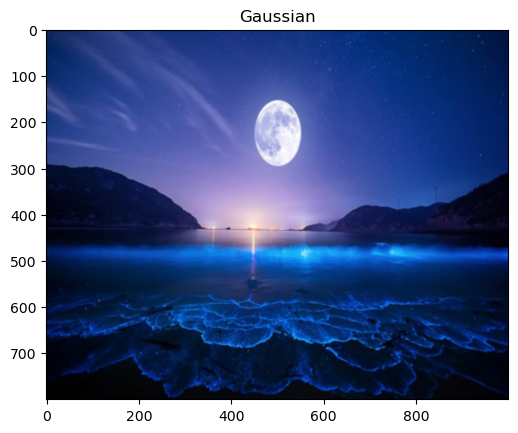

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


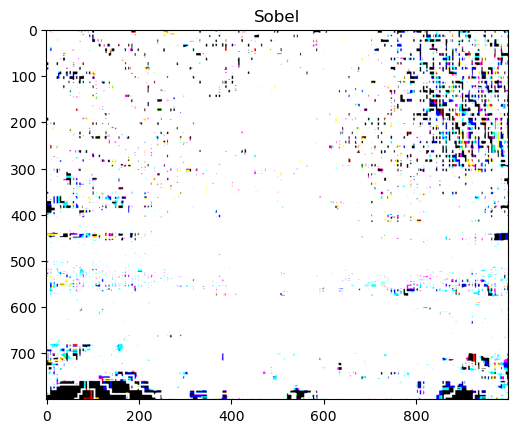

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


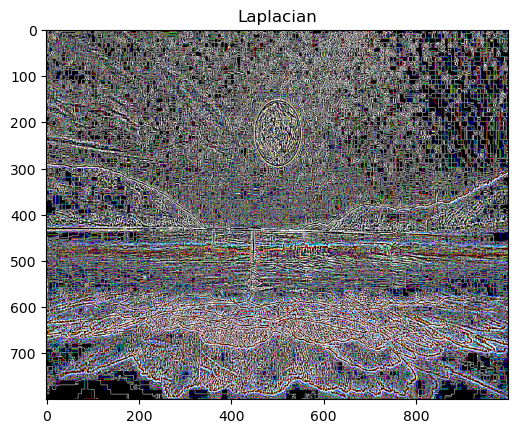

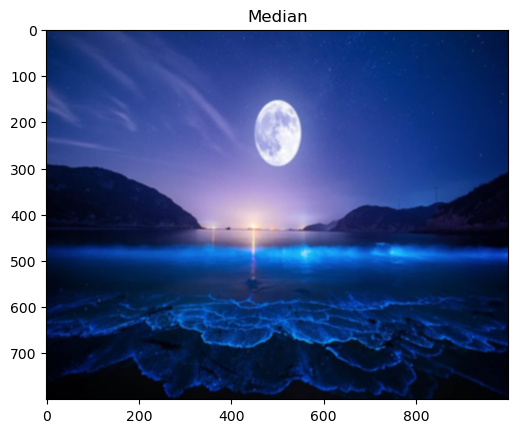

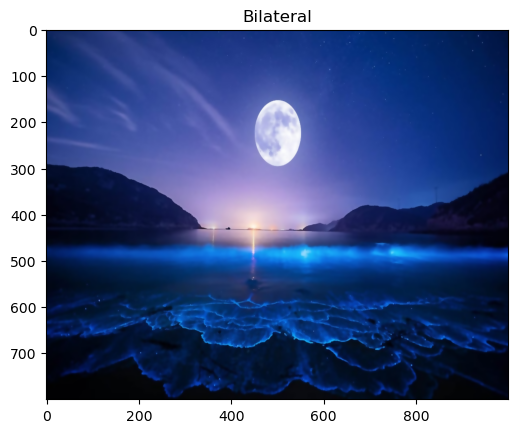

In [ ]:
titles=['OG','Mean','Gaussian','Sobel','Laplacian','Median','Bilateral']
images=[image,mean_filtered,gaussian_filtered,sobel_filtered,laplacian_filtered,mean_filtered,bilateral_filtered]
plt.Figure(figsize=(15,10))
for i in range(0,7):
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.show()

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [ ]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test=x_test.reshape(10000,784)

In [ ]:
def apply_filter(image):
    mean_filtered=[]
    gaussian_filtered=[]
    sobel_filtered=[]
    laplacian_filtered=[]
    median_filtered=[]

    for img in image:
        img=img.squeeze()

        mean_kernel=np.ones((3,3),np.float32)/9
        mean_filtered_img=cv2.filter2D(img,-1,mean_kernel)
        mean_filtered.append(mean_filtered_img)

        gaussian_filtered_img=cv2.GaussianBlur(img,(3,3),0)
        gaussian_filtered.append(gaussian_filtered_img)

    ##sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    ##sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    ##sobel_filtered_img=np.hypot(sobelx,sobely)
    ##sobel_filtered.append(sobel_filtered_img)
    return np.array(mean_filtered),np.array(gaussian_filtered)
mean_x_train,gaussian_x_train=apply_filter(x_train)
mean_x_test,gaussian_x_test=apply_filter(x_test)

In [ ]:
mean_x_train=mean_x_train.reshape(mean_x_train.shape[0],-1)
gaussian_x_train=gaussian_x_train.reshape(gaussian_x_train.shape[0],-1)
mean_x_test=mean_x_test.reshape(mean_x_test.shape[0],-1)
gaussian_x_test=gaussian_x_test.reshape(gaussian_x_test.shape[0],-1)

In [ ]:
svm=SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svm.predict(x_test)
print('Accuracy wihtout filter: ',accuracy_score(y_test,y_pred))
print('Classification Report: ',classification_report(y_test,y_pred))

Accuracy wihtout filter:  0.9404
Classification Report:                precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [ ]:
svm1=SVC(kernel='linear')
svm1.fit(mean_x_train, y_train)
svm2=SVC(kernel='linear')
svm2.fit(gaussian_x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svm1.predict(mean_x_test)
print('Accuracy wihtout filter: ',accuracy_score(y_test,y_pred))
print('Classification Report: ',classification_report(y_test,y_pred))
y_pred=svm1.predict(gaussian_x_test)
print('Accuracy wihtout filter: ',accuracy_score(y_test,y_pred))
print('Classification Report: ',classification_report(y_test,y_pred))

Accuracy wihtout filter:  0.9458
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.94      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.93      0.91      0.92       892
           6       0.96      0.96      0.96       958
           7       0.96      0.93      0.94      1028
           8       0.93      0.90      0.92       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Accuracy wihtout filter:  0.9447
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1      

## Clustering

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mode
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
mnist=fetch_openml('mnist_784',version=1)
x=mnist.data
y=mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
x_scaled=StandardScaler().fit_transform(x)
pca=PCA(n_components=50)
x_PCA=pca.fit_transform(x_scaled)

In [4]:
kmeans=KMeans(n_clusters=10,random_state=42)
kmeans.fit(x_PCA)
clusters=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
labels=np.zeros_like(clusters)
for i in range(10):
  mask=(clusters==i)
  labels[mask]=mode(y[mask])[0]

In [9]:
accuracy=accuracy_score(y,labels)
print(f'clustering accuracy:{accuracy*100:.2f}%')

clustering accuracy:52.72%


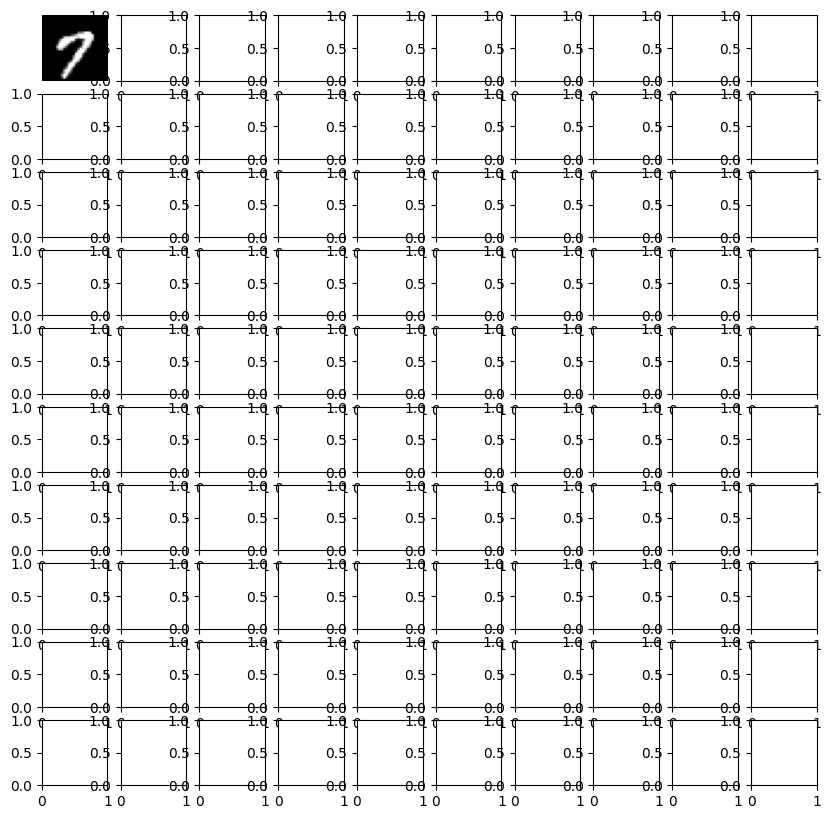

In [14]:
import matplotlib.pyplot as plt
def plot_digits(data,clusters,num_images=10):
  fig,axes=plt.subplots(num_images,10,figsize=(10,num_images))
  for i in range(num_images):
    for j in range(10):
      axes[i,j].imshow(data[clusters==j][i].reshape(28,28),cmap='gray')
      axes[i,j].axis('off')
      plt.show()
plot_digits(x.values,clusters)

In [16]:
count=[0,0,0,0,0,0,0,0,0,0]
for i in range(len(labels)):
  if(y[i]!=labels[i]):
    count[y[i]]=count[y[i]]+1
print(count)

[2960, 245, 2761, 3006, 2893, 3620, 1568, 2257, 6825, 6958]
